# **EDA of the UCI Adult Census Income Dataset**

*by Natalia Zelenko*

**Dataset:** UCI “Adult” Census Income dataset  
**Goal:** Explore how demographic factors (education, sex, race, marital status, age) relate to income, using both unweighted and population-weighted summaries.

**About the dataset and the weighting variable**

The dataset is derived by Barry Becker from the U.S. Census Bureau's Current Population Survey (CPS, 1994) and released in a simplified form as the “Adult” Census Income dataset. It contains demographic and economic attributes of individuals aged 16+ in the civilian non-institutional population, including age, education, occupation, hours worked, race, sex, and a binary income indicator (>50K / ≤50K).

Unlike most fields, the variable fnlwgt (final weight) does not describe an observed characteristic of the respondent. It is a survey weight computed by the Census Bureau to indicate how many people in the full U.S. population a given record represents. A weight of 1000 means the respondent stands in for roughly 1000 similar individuals in the population. Using these weights allows summary statistics to reflect population-level estimates rather than the sample composition.

In this report, we include both unweighted and weighted values to explore the nature of the weighting variable itself and examine how it influences summary statistics in this particular dataset.

## **1. Preparatory Steps**

### **1.1 Imports and settings**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max.columns", 100)
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
data_url_str = 'data/adult.data.csv'
weight_col = 'fnlwgt'

### **1.2 Reading the dataset into a Pandas DataFrame**

In [3]:
data_df = pd.read_csv(data_url_str)
print(data_df.head(5))

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

## **2. General Dataset Overwiew**

### **2.1 Size**

To inspect the dataset's dimensions, we used the *shape* attribute of the DataFrame.

In [4]:
rows, cols = data_df.shape
print(f'The Adult dataset has {rows} observations and {cols} variables.')

The Adult dataset has 32561 observations and 15 variables.


### **2.2. Columns and missing values**

First, we use the .info() method to view column names, non-null counts, and data types.

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The .info() output reports no missing values, but the dataset actually encodes them as '?'. To identify these entries, we count how many '?' values occur in each column.

In [6]:
(data_df == '?').sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

We replace '?' with proper missing values using .replace(), and then recompute the number of missing entries with .isna().sum().

In [7]:
data_df = data_df.replace('?', pd.NA)
data_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

To identify numerical columns, we selected columns with numeric data types. (Some, such as education-num, encode categories despite being stored as numbers.)

In [8]:
num_cols = data_df.select_dtypes(include=['number']).columns
print(f'The dataset appears to have {len(num_cols)} numerical variables.')
print("Namely:", list(num_cols))

The dataset appears to have 6 numerical variables.
Namely: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### **2.3 Basic Statistics**

We use the .describe() method to summarize numerical and categorical variables.

Note that these are unweighted sample statistics, not weighted population estimates.

In [9]:
data_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data_df.select_dtypes(include=['object']).describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### **2.4 Creating a working copy of the dataset**

We create a working copy of the dataset and drop several columns that are either redundant (education-num) or not needed for the analyses in this notebook (capital-gain, capital-loss, relationship).

In [82]:
data_work_df = data_df.copy().drop(columns=['education-num', 'capital-gain', 'capital-loss', 'relationship'])
data_work_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

## **3. Exploring the data**

### **3.1 Categorical variables: unique values and missingness**

#### **3.1.1 Helper functions**

To summarize each categorical variable, we compute the percentage distribution of its values and include the share of missing entries.

In [12]:
def sample_value_percentages(df, column_name, axis_label):
    """Return percentage distribution for a categorical column."""
    return (
        df[column_name]
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .rename_axis(axis_label)
        .reset_index(name='percentage')
    )


We also define a helper function for computing weighted value percentages using the fnlwgt column.

In [13]:
def weighted_value_percentages(df, group_col, weight_col, axis_label):
    """Return weighted percentage distribution for a categorical column."""
    return (
        df.groupby(group_col)[weight_col]
        .sum()
        .pipe(lambda s: s / s.sum() * 100)
        .round(2)
        .rename_axis(axis_label)
        .reset_index(name='weighted_percentage')
        .sort_values(by='weighted_percentage', ascending=False)
    )


We define a small helper to display the percentage of missing values in a column.

In [14]:
def show_missing_percentage(df, column):
    """Print the percentage of missing values in a column."""
    missing_percentage = df[column].isna().mean() * 100
    print(f"Percentage of missing values in '{column}': {round(missing_percentage, 2)}%")

#### ***3.1.2 Workclass***

In [15]:
sample_value_percentages(data_work_df, 'workclass', 'Employment category(workclass)')

,Employment category(workclass),percentage
0,Private,73.87
1,Self-emp-not-inc,8.27
2,Local-gov,6.81
3,State-gov,4.22
4,Self-emp-inc,3.63
5,Federal-gov,3.12
6,Without-pay,0.05
7,Never-worked,0.02


In [16]:
weighted_value_percentages(data_work_df, 'workclass', weight_col, 'Employment category(workclass)')

,Employment category(workclass),weighted_percentage
3,Private,75.00
5,Self-emp-not-inc,7.65
1,Local-gov,6.77
6,State-gov,4.10
4,Self-emp-inc,3.37
0,Federal-gov,3.05
7,Without-pay,0.04
2,Never-worked,0.03


In [17]:
show_missing_percentage(data_work_df, 'workclass')

Percentage of missing values in 'workclass': 5.64%


The dataset shows a strong imbalance in employment categories, with about three quarters of respondents working in the private sector (and the weighted population estimate closely mirrors the unweighted sample distribution). Even after merging smaller categories into a single “non-private” group, the imbalance remains substantial. Therefore, any comparison between workclass and salary would have to be interpreted with caution, as observed differences might partly reflect unequal group sizes rather than genuine disparities. *Given this imbalance, the workclass variable will be excluded from further analysis.*

In [18]:
data_work_df.drop(columns=['workclass'], inplace=True)

#### ***3.1.3 Education***

In [19]:
sample_value_percentages(data_work_df, 'education', 'Education level')

,Education level,percentage
0,HS-grad,32.25
1,Some-college,22.39
2,Bachelors,16.45
3,Masters,5.29
4,Assoc-voc,4.24
5,11th,3.61
6,Assoc-acdm,3.28
7,10th,2.87
8,7th-8th,1.98
9,Prof-school,1.77


In [20]:
weighted_value_percentages(data_work_df, 'education', weight_col, 'Education level')

,Education level,weighted_percentage
11,HS-grad,32.21
15,Some-college,22.27
9,Bachelors,16.30
12,Masters,5.01
8,Assoc-voc,4.07
1,11th,3.71
7,Assoc-acdm,3.34
0,10th,2.97
5,7th-8th,1.97
14,Prof-school,1.73


In [21]:
show_missing_percentage(data_work_df, 'education')

Percentage of missing values in 'education': 0.0%


Weighted and unweighted distributions of education levels are nearly identical.

For interpretability, education levels will later be analyzed in four aggregated groups reflecting typical stages of formal education:
1. Below high school (Preschool–12th);
2. High school graduate;
3. Some college or associate degree;
4. Bachelor's degree or higher.

This grouping follows the standard U.S. educational progression and also yields reasonably balanced category sizes in the dataset.


#### ***3.1.4 Marital status***

In [22]:
sample_value_percentages(data_work_df, 'marital-status', 'Marital status')

,Marital status,percentage
0,Married-civ-spouse,45.99
1,Never-married,32.81
2,Divorced,13.65
3,Separated,3.15
4,Widowed,3.05
5,Married-spouse-absent,1.28
6,Married-AF-spouse,0.07


In [23]:
weighted_value_percentages(data_work_df, 'marital-status', weight_col, 'Marital status')

,Marital status,weighted_percentage
2,Married-civ-spouse,45.26
4,Never-married,33.78
0,Divorced,13.36
5,Separated,3.42
6,Widowed,2.80
3,Married-spouse-absent,1.31
1,Married-AF-spouse,0.07


In [24]:
show_missing_percentage(data_work_df, 'marital-status')

Percentage of missing values in 'marital-status': 0.0%


Weighted and unweighted distributions of marital status are nearly identical.

The largest group consists of “Married-civ-spouse” respondents (about 45%), followed by “Never-married” (around 33%), while all other categories together account for roughly one fifth of the data. For analysis, these categories will be grouped into three broader and socially meaningful groups: Married (including all married subtypes), Never married, and Formerly married (divorced, separated, or widowed). This grouping preserves interpretability while ensuring adequate group sizes for reliable comparison.

#### ***3.1.5 Occupation***

In [25]:
sample_value_percentages(data_work_df, 'occupation', 'Occupation')

,Occupation,percentage
0,Prof-specialty,13.48
1,Craft-repair,13.34
2,Exec-managerial,13.24
3,Adm-clerical,12.27
4,Sales,11.88
5,Other-service,10.73
6,Machine-op-inspct,6.52
7,Transport-moving,5.20
8,Handlers-cleaners,4.46
9,Farming-fishing,3.24


In [26]:
weighted_value_percentages(data_work_df, 'occupation', weight_col, 'Occupation')

,Occupation,weighted_percentage
2,Craft-repair,13.50
9,Prof-specialty,13.15
3,Exec-managerial,12.86
0,Adm-clerical,12.42
11,Sales,11.95
7,Other-service,10.66
6,Machine-op-inspct,6.70
13,Transport-moving,5.21
5,Handlers-cleaners,4.80
12,Tech-support,3.06


In [27]:
show_missing_percentage(data_work_df, 'occupation')

Percentage of missing values in 'occupation': 5.66%


*Because the variable contains many fine-grained and imbalanced categories that complicate interpretation, it will be excluded from further analysis.*

In [28]:
data_work_df.drop(columns=['occupation'], inplace=True)

#### ***3.1.6 Race***

In [29]:
sample_value_percentages(data_work_df, 'race', 'Race')

,Race,percentage
0,White,85.43
1,Black,9.59
2,Asian-Pac-Islander,3.19
3,Amer-Indian-Eskimo,0.96
4,Other,0.83


In [30]:
weighted_value_percentages(data_work_df, 'race', weight_col, 'Race')


,Race,weighted_percentage
4,White,84.31
2,Black,11.53
1,Asian-Pac-Islander,2.69
3,Other,0.86
0,Amer-Indian-Eskimo,0.61


In [31]:
show_missing_percentage(data_work_df, 'race')

Percentage of missing values in 'race': 0.0%


The dataset is dominated by White respondents (about 85% in the sample and 84% in the weighted estimate). The weighted and unweighted distributions match closely.

Despite the imbalance, the variable is retained because of its social significance and potential relevance to income-related disparities. However, results involving race should be interpreted with caution due to the strong imbalance between groups. For interpretability, comparisons will focus on the two largest groups, White and Black respondents.

#### ***3.1.7 Sex***

In [32]:
sample_value_percentages(data_work_df, 'sex', 'Sex')

,Sex,percentage
0,Male,66.92
1,Female,33.08


In [33]:
weighted_value_percentages(data_work_df, 'sex', weight_col, 'Sex')


,Sex,weighted_percentage
1,Male,67.62
0,Female,32.38


In [34]:
show_missing_percentage(data_work_df, 'sex')

Percentage of missing values in 'sex': 0.0%


The dataset contains about twice as many men as women (67% vs. 33%), and the weighted distribution closely matches the sample.

#### ***3.1.8 Native country (country of birth)***

In [35]:
sample_value_percentages(data_work_df, 'native-country', 'Country of birth')

,Country of birth,percentage
0,United-States,91.22
1,Mexico,2.01
2,Philippines,0.62
3,Germany,0.43
4,Canada,0.38
5,Puerto-Rico,0.36
6,El-Salvador,0.33
7,India,0.31
8,Cuba,0.30
9,England,0.28


In [36]:
weighted_value_percentages(data_work_df, 'native-country', weight_col, 'Country of birth')


,Country of birth,weighted_percentage
38,United-States,89.95
25,Mexico,3.07
29,Philippines,0.54
7,El-Salvador,0.44
10,Germany,0.43
4,Cuba,0.39
32,Puerto-Rico,0.38
1,Canada,0.36
12,Guatemala,0.28
22,Jamaica,0.28


In [37]:
show_missing_percentage(data_work_df, 'native-country')

Percentage of missing values in 'native-country': 1.79%


The vast majority of respondents were born in the United States (about 91% in the sample and 90% in the weighted population estimate). The next largest group—individuals born in Mexico—accounts for only about 3%, while all other countries contribute less than one percent each. The weighted and unweighted distributions are very similar.

*Because of the extreme imbalance and the large number of small categories, this variable will be excluded from further analysis.*

In [38]:
data_work_df.drop(columns=['native-country'], inplace=True)

#### ***3.1.9 Salary (income level)***

In [39]:
sample_value_percentages(data_work_df, 'salary', 'Income level')

,Income level,percentage
0,<=50K,75.92
1,>50K,24.08


In [40]:
weighted_value_percentages(data_work_df, 'salary', weight_col, 'Income level')


,Income level,weighted_percentage
0,<=50K,76.14
1,>50K,23.86


In [41]:
show_missing_percentage(data_work_df, 'salary')

Percentage of missing values in 'salary': 0.0%


The salary variable serves as the outcome of interest, indicating whether an individual’s annual income exceeds $50,000. In the sample, 75.9% fall into the lower-income category and 24.1% into the higher-income one. The weighted population estimate shows nearly identical proportions.

### **3.2 Numerical variables**

#### **3.2.1 Helper functions**


We define a helper function to compute weighted estimates of the mean and standard deviation.

In [42]:
def weighted_stats(df, col, weight_col):
    """Compute weighted mean and standard deviation for a column."""
    x = df[col]
    w = df[weight_col]

    # weighted mean
    w_mean = np.average(x, weights=w)

    # weighted variance and std
    w_var = np.average((x - w_mean)**2, weights=w)
    w_std = np.sqrt(w_var)

    s = pd.Series({
        'weighted_mean': w_mean,
        'weighted_std': w_std
    })
    s.name = col

    return s

We define a helper to plot sample vs weighted distributions for numerical variables.

In [43]:
def plot_sample_vs_weighted_hist(df, column, weight_col, bins=30, title=None):
    """Plot sample vs weighted histograms for a numerical column."""
    plt.figure(figsize=(6, 4))

    # sample histogram
    sns.histplot(
        data=df, x=column, bins=bins,
        stat='percent', color='skyblue', alpha=0.5, label='Sample'
    )

    # weighted histogram
    sns.histplot(
        data=df, x=column, bins=bins,
        weights=df[weight_col], stat='percent',
        color='salmon', alpha=0.4, label='Weighted (Population)'
    )

    plt.title(title or f'{column.capitalize()} Distribution: Sample vs Population Estimate')
    plt.xlabel(column.capitalize())
    plt.ylabel('Percentage')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### ***3.2.2 Age***

In [44]:
data_work_df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [45]:
weighted_stats(data_work_df, 'age', weight_col)

weighted_mean    38.000193
weighted_std     13.467618
Name: age, dtype: float64

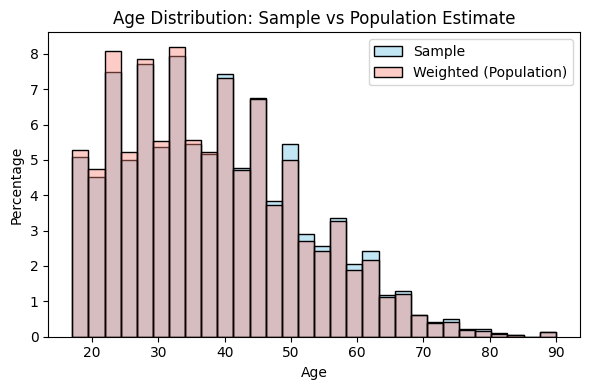

In [46]:
plot_sample_vs_weighted_hist(data_work_df, 'age', weight_col)


Respondents' ages range from 17 to 90 years, with an average of about 38 years and a standard deviation of roughly 13.6. The weighted population estimate produces nearly identical values to the raw sample.

The age distribution is right-skewed, with most individuals concentrated between their late 20s and late 40s and progressively fewer respondents at older ages. Weighting does not change the shape of the distribution.

#### ***3.2.3 Work hours per week***

In [47]:
data_work_df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [48]:
weighted_stats(data_work_df, 'hours-per-week', weight_col)

weighted_mean    40.30857
weighted_std     12.09672
Name: hours-per-week, dtype: float64

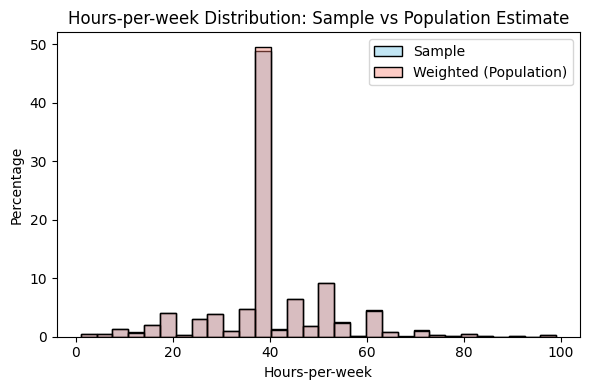

In [49]:
plot_sample_vs_weighted_hist(data_work_df, 'hours-per-week', weight_col)


Hours worked per week ranges from 1 to 99, with a strong concentration around 40 hours, reflecting full-time employment. Weighted and unweighted summaries are nearly identical.

*Because the distribution is extremely concentrated with little analytical variation, the variable was excluded from further analysis.*


In [50]:
data_work_df.drop(columns=['hours-per-week'], inplace=True)

### **3.3 Selected variables for further analysis**

We retain only the most relevant and well-defined variables for subsequent analysis.

In [51]:
cols = data_work_df.columns
print(f'After exploring the data, we proceed with {len(cols)} variables: {list(cols)}')

After exploring the data, we proceed with 7 variables: ['age', 'fnlwgt', 'education', 'marital-status', 'race', 'sex', 'salary']


## **4. Significance of fnlwgt**

As established earlier, the variable fnlwgt (final weight) represents how many people in the full survey population each individual record corresponds to. In other words, every observation is assigned a weight indicating the approximate number of similar individuals in the 1994 U.S. Census Bureau's Current Population Survey (CPS) who share the same characteristics.

In this analysis so far, weighted proportions were obtained by summing the weights within each category and dividing by the total of all weights. For example, when computing the distribution of men and women, the dataset is grouped by sex, and the weights are summed within each group to produce estimated population counts. These totals are then normalized to percentages, resulting in what can be referred to as ***population estimates***.

It is important to note, however, that the Adult dataset is not a simple random sample of the entire U.S. population, but rather a filtered subset of the CPS, restricted to individuals with reported work and income information. Consequently, the resulting “population estimates” are representative only within this dataset's scope, not of the full U.S. population.

This explains why the weighted and unweighted distributions are very similar, and why certain proportions (for example, the ratio of men to women) may differ from official census figures or common sense. For the purposes of this introductory analysis, the term ***“population estimate”*** may continue to be used for consistency, but it ***should be understood as referring to the estimated distribution within the survey frame rather than the U.S. population as a whole***.

For further illustration, we will now perform a calculation involving multiple variables, both unweighted and weighted.

***What percentage of men and women whose education level is 'high-school graduate' have high income?***

In [52]:
subset = data_work_df[
    (data_work_df['race'] == 'Black') &
    (data_work_df['marital-status'].str.startswith('Married')) &
    (data_work_df['education'] == 'HS-grad')
]

# unweighted % within each sex
unweighted_pct = (
    subset.groupby('sex')['salary']
    .apply(lambda s: (s == '>50K').mean() * 100)
    .rename('unweighted_%')
)

# weighted % within each sex
weighted_pct = (
    subset.groupby('sex')
    .apply(lambda g: g.loc[g['salary'] == '>50K', 'fnlwgt'].sum() /
                      g['fnlwgt'].sum() * 100)
    .rename('weighted_%')
)

result = (
    pd.concat([unweighted_pct, weighted_pct], axis=1)
    .round({'unweighted_%': 2, 'weighted_%': 2})
)

print('Percentage of black high-school graduates with high income among men and women')
print(result)


Percentage of black high-school graduates with high income among men and women
        unweighted_%  weighted_%
sex                             
Female         13.70       15.79
Male           25.37       26.53


The weighted estimates slightly increase the proportion of high-income individuals, particularly among women. However, the difference between weighted and unweighted results is small (around one to two percentage points) and does not alter the overall conclusion.

## **5. Some meaningful questions**

### **5.1 Income vs Education Level and Sex/Race**

#### **5.1.1 Bin education level**

For reasons stated in 3.1.3, we are going to bin education level into four categories.

In [53]:
def bin_education(ed_col):
    if ed_col in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Below HS'
    elif ed_col == 'HS-grad':
        return 'High school'
    elif ed_col in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Some college / Associate'
    else:  # Bachelors, Masters, Doctorate, Prof-school
        return 'Bachelor or higher'

data_work_df['edu_group'] = data_work_df['education'].apply(bin_education)
# data_work_df[['education', 'edu_group']].head(5)
# data_work_df['edu_group'].isna().sum()


#### ***5.1.2 How does the probability of earning >50K change with education level?***

In [54]:
# unweighted % earning >50K per Group
unweighted = (
    data_work_df.groupby('edu_group')['salary']
      .apply(lambda s: (s == '>50K').mean() * 100)
      .rename('unweighted_%')
      .reset_index()
)

# weighted % earning >50K per Group
def weighted_high_income(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

weighted = (
    data_work_df.groupby('edu_group')
      .apply(weighted_high_income)
      .rename('weighted_%')
      .reset_index()
)

# combine and sort
edu_income = pd.merge(unweighted, weighted, on='edu_group')
edu_income = edu_income.sort_values('unweighted_%', ascending=False)
edu_income

,edu_group,unweighted_%,weighted_%
0,Bachelor or higher,48.456675,48.782452
3,Some college / Associate,20.667351,21.112193
2,High school,15.950862,15.567959
1,Below HS,5.737127,5.256149


**The share of high-income individuals increases sharply with education level.**
Weighted estimates follow the same pattern, showing that the weighting factor does not substantially change the relationship.

Individuals with a bachelor's degree or higher are more than three times as likely to earn >50K as those with a high school diploma (48.8% vs 15.6%), and nearly nine times as likely as those who did not complete high school (5.3%).
Those with some college or an associate degree fall in between, with around 21% earning >50K.

#### ***5.1.3 Does it differ between men and women?***

In [55]:
pivot_unweighted = (
    data_work_df.pivot_table(
        index='edu_group',
        columns='sex',
        values='salary',
        aggfunc=lambda s: (s == '>50K').mean() * 100
    )
)
pivot_unweighted = pivot_unweighted.reindex(
    ['Below HS', 'High school', 'Some college / Associate', 'Bachelor or higher']
)
pivot_unweighted = pivot_unweighted.sort_values(by='Male', ascending=False)

pivot_unweighted


sex,Female,Male
edu_group,,
Bachelor or higher,26.146592,57.534008
Some college / Associate,8.585994,28.155663
High school,6.666667,20.376881
Below HS,1.741105,7.537517


In [56]:
def weighted_high_income_by_sex(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

pivot_weighted = (
    data_work_df.groupby(['edu_group', 'sex'])
      .apply(weighted_high_income_by_sex)
      .unstack('sex')
      .reindex(['Below HS', 'High school', 'Some college / Associate', 'Bachelor or higher'])
)
pivot_weighted = pivot_weighted.sort_values(by='Male', ascending=False)

pivot_weighted

sex,Female,Male
edu_group,,
Bachelor or higher,26.281916,57.570945
Some college / Associate,8.765582,28.525901
High school,6.605866,19.772263
Below HS,1.357330,6.919860


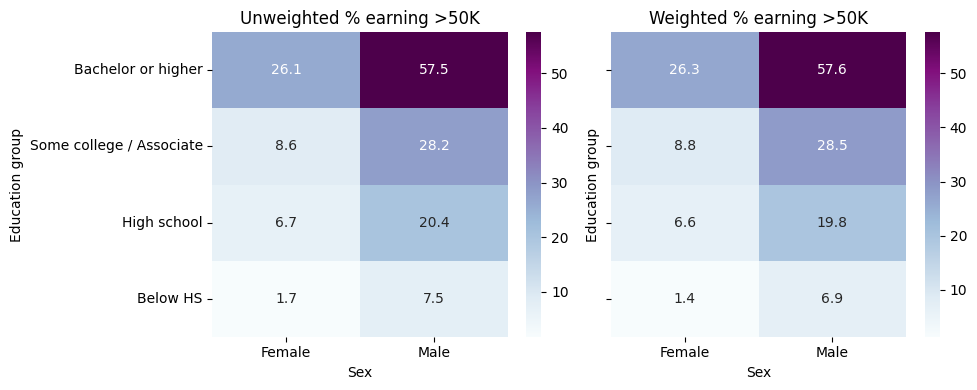

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.heatmap(pivot_unweighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[0])
axes[0].set_title("Unweighted % earning >50K")

sns.heatmap(pivot_weighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[1])
axes[1].set_title("Weighted % earning >50K")

for ax in axes:
    ax.set_xlabel("Sex")
    ax.set_ylabel("Education group")

plt.tight_layout()
plt.show()

**The probability of earning more than 50K increases markedly with education level for both sexes.** Among men, the share of high earners rises from about 7 % below high school to nearly 58 % among those with a bachelor's degree or higher.
For women, the corresponding increase is from roughly 2 % to 26 %.
**The gender gap is present across all education groups, with men consistently about 2–3 times more likely than women to reach the higher income category.**
Applying weights produces almost identical results.

#### ***5.1.4 Does it differ between Black and White individuals?***

*Note: see 3.1.6 on the imbalance in the race variable.*

In [58]:
race_subset = data_work_df[data_work_df['race'].isin(['White', 'Black'])]

In [59]:
pivot_unweighted = (
    race_subset.pivot_table(
        index='edu_group',
        columns='race',
        values='salary',
        aggfunc=lambda s: (s == '>50K').mean() * 100
    )
)
pivot_unweighted = pivot_unweighted.reindex(
    ['Below HS', 'High school', 'Some college / Associate', 'Bachelor or higher']
)
pivot_unweighted = pivot_unweighted.sort_values(by='White', ascending=False)
pivot_unweighted


race,Black,White
edu_group,,
Bachelor or higher,34.615385,49.901436
Some college / Associate,12.746114,21.887381
High school,7.325383,17.318059
Below HS,4.604052,5.975294


In [60]:
def weighted_high_income_by_race(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

pivot_weighted = (
    race_subset.groupby(['edu_group', 'race'])
        .apply(weighted_high_income_by_race)
        .unstack('race')
        .reindex(['Below HS', 'High school', 'Some college / Associate', 'Bachelor or higher'])
)

pivot_weighted = pivot_weighted.sort_values(by='White', ascending=False)

pivot_weighted

race,Black,White
edu_group,,
Bachelor or higher,33.268392,50.515333
Some college / Associate,13.297424,22.409628
High school,8.294629,16.945906
Below HS,4.760886,5.402172


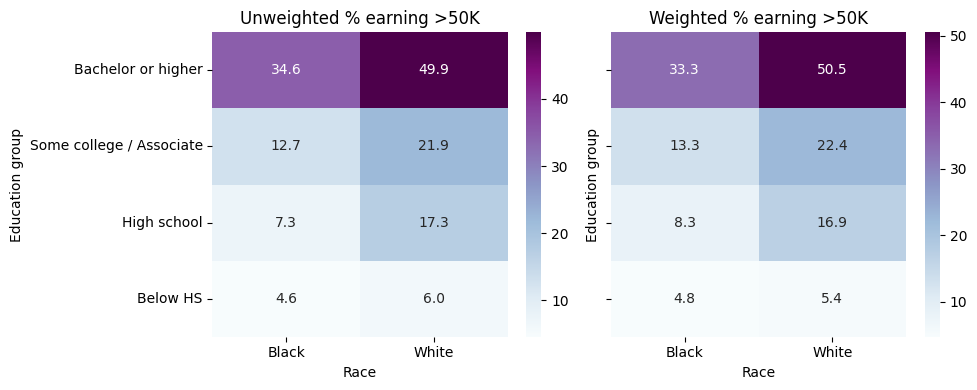

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.heatmap(pivot_unweighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[0])
axes[0].set_title("Unweighted % earning >50K")

sns.heatmap(pivot_weighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[1])
axes[1].set_title("Weighted % earning >50K")

for ax in axes:
    ax.set_xlabel("Race")
    ax.set_ylabel("Education group")

plt.tight_layout()
plt.show()


**The likelihood of earning more than 50K increases with education for both racial groups, but remains consistently lower among Black respondents at each education level.**
Among respondents with a bachelor's degree or higher, about 33% of Black and 50% of White individuals earn >50K. At the opposite end of the spectrum, earnings below the high-school level drop to around 5–6% for both groups.

The racial income gap is present at every education level, though it becomes smaller at the lower end of the education range. Weighting the data barely changes the picture.

#### ***5.1.5 How do income outcomes differ for Black women compared to other groups?***
Here I show only the unweighted results to keep the section concise. The weighted values behave the same way, as demonstrated earlier.

In [62]:
pivot_intersection = (
    race_subset.pivot_table(
        index='edu_group',
        columns=['race', 'sex'],
        values='salary',
        aggfunc=lambda s: (s == '>50K').mean() * 100
    )
)

pivot_intersection = pivot_intersection.reindex(
    ['Bachelor or higher', 'Some college / Associate', 'High school', 'Below HS' ]
)

pivot_intersection = pivot_intersection[
    [('Black', 'Female'),
     ('White', 'Female'),
     ('Black', 'Male'),
     ('White', 'Male')]
]

pivot_intersection

race,Black,White,Black,White
sex,Female,Female,Male,Male
edu_group,,,,
Bachelor or higher,21.698113,26.842908,46.521739,58.734177
Some college / Associate,5.142857,9.244533,21.818182,29.071738
High school,2.108963,7.735426,12.231405,21.435453
Below HS,2.008032,1.427115,6.802721,7.760000


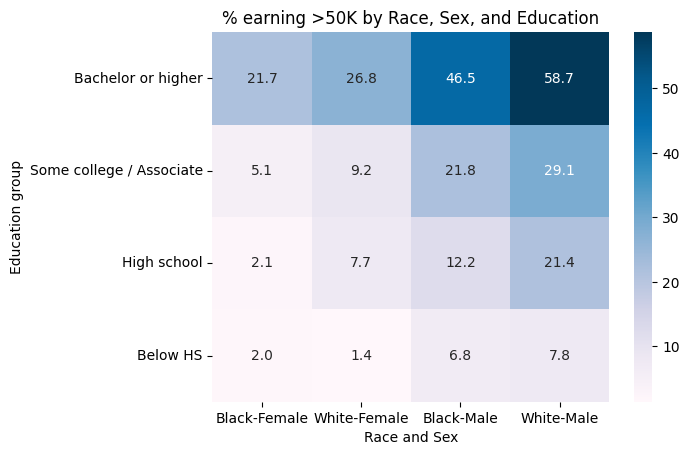

In [63]:
sns.heatmap(pivot_intersection, annot=True, fmt=".1f", cmap="PuBu")
plt.title("% earning >50K by Race, Sex, and Education")
plt.xlabel("Race and Sex")
plt.ylabel("Education group")
plt.show()

Higher education improves income prospects for all groups, but **Black women consistently appear at the bottom of the income distribution**. Both the gender gap and racial gap are visible, and together they widen the disadvantage for Black women compared with the other groups.

### **5.2 Income vs Marital Status and Sex/Race**

#### **5.2.1 Bin marital status**

For reasons stated in 3.1.4, we are going to bin marital status into three categories.

In [64]:
def bin_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']:
        return 'Married'
    elif status == 'Never-married':
        return 'Never married'
    elif status in ['Divorced', 'Separated', 'Widowed']:
        return 'Formerly married'

data_work_df['marital_group'] = data_work_df['marital-status'].apply(bin_marital_status)

# data_work_df[['marital-status', 'marital_group']].drop_duplicates()
# data_work_df['marital_group'].isna().sum()


#### ***5.2.2 How does the probability of earning >50K change with marital status?***

In [65]:
# unweighted % earning >50K per Group
unweighted = (
    data_work_df.groupby('marital_group')['salary']
      .apply(lambda s: (s == '>50K').mean() * 100)
      .rename('unweighted_%')
      .reset_index()
)

# weighted % earning >50K per Group
def weighted_high_income(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

weighted = (
    data_work_df.groupby('marital_group')
      .apply(weighted_high_income)
      .rename('weighted_%')
      .reset_index()
)

marital_income = pd.merge(unweighted, weighted, on='marital_group')
marital_income = marital_income.sort_values('unweighted_%', ascending=False)
marital_income

,marital_group,unweighted_%,weighted_%
1,Married,43.692028,43.874105
0,Formerly married,9.503173,9.364869
2,Never married,4.596087,4.616666


**Income differs sharply across marital groups.** Married individuals show the highest share of >50K earners (about 44%), which is several times higher than among formerly married individuals and much higher than among those who have never married.

These differences likely reflect correlations between marital status and other factors in the dataset (e.g., age, work experience), so they should be interpreted as descriptive rather than causal.

The weighted percentages closely match the unweighted ones.

#### ***5.2.3 Does it differ between men and women?***

In [66]:
pivot_unweighted = (
    data_work_df.pivot_table(
        index='marital_group',
        columns='sex',
        values='salary',
        aggfunc=lambda s: (s == '>50K').mean() * 100
    )
)

pivot_unweighted = pivot_unweighted.reindex(
    ['Married', 'Formerly married', 'Never married']
)
pivot_unweighted = pivot_unweighted.sort_values(by='Male', ascending=False)

pivot_unweighted



sex,Female,Male
marital_group,,
Married,41.098081,44.051399
Formerly married,5.862403,15.945135
Never married,3.482274,5.493577


In [67]:
def weighted_high_income_by_sex(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

pivot_weighted = (
    data_work_df.groupby(['marital_group', 'sex'])
      .apply(weighted_high_income_by_sex)
      .unstack('sex')
      .reindex(['Married', 'Formerly married', 'Never married'])
)

pivot_weighted = pivot_weighted.sort_values(by='Male', ascending=False)

pivot_weighted


sex,Female,Male
marital_group,,
Married,41.525877,44.188577
Formerly married,5.698797,15.593987
Never married,3.540516,5.430117


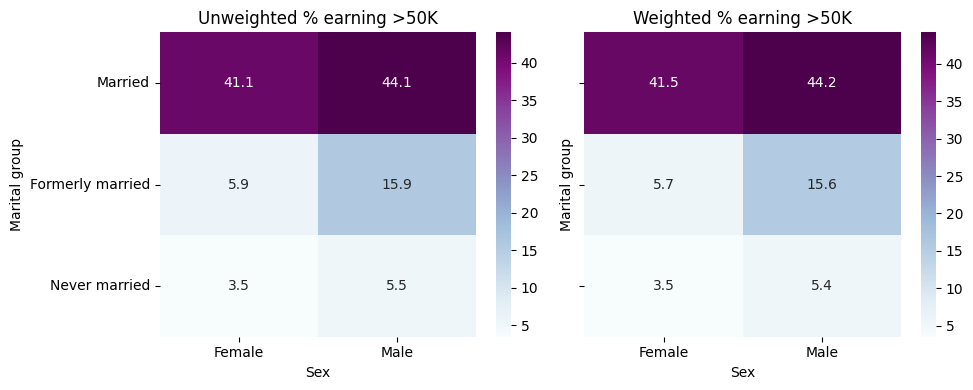

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.heatmap(pivot_unweighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[0])
axes[0].set_title("Unweighted % earning >50K")

sns.heatmap(pivot_weighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[1])
axes[1].set_title("Weighted % earning >50K")

for ax in axes:
    ax.set_xlabel("Sex")
    ax.set_ylabel("Marital group")

plt.tight_layout()
plt.show()


The probability of earning more than 50K varies across marital groups for both sexes. Among married individuals, about 44% of men and 41% of women earn above 50K, showing only a modest gender gap. For the formerly married, however, the difference widens considerably: around 16% of men versus 6% of women reach the higher income level.
The never-married group has the lowest shares overall, at 5% for men and 3–4% for women.

Thus, **the income gap between sexes remains relatively small among the married but becomes larger among the formerly married**.

Applying weights produces virtually identical results.

#### ***5.2.4 Does it differ between Black and White individuals?***

In [69]:
race_subset = data_work_df[data_work_df['race'].isin(['White', 'Black'])]

In [70]:
pivot_unweighted = (
    race_subset.pivot_table(
        index='marital_group',
        columns='race',
        values='salary',
        aggfunc=lambda s: (s == '>50K').mean() * 100
    )
)

pivot_unweighted = pivot_unweighted.reindex(
    ['Married', 'Formerly married', 'Never married']
)

pivot_unweighted = pivot_unweighted.sort_values(by='White', ascending=False)

pivot_unweighted



race,Black,White
marital_group,,
Married,34.222222,44.756977
Formerly married,5.125285,10.232384
Never married,2.526003,4.898938


In [71]:
def weighted_high_income_by_race(g):
    w = g['fnlwgt']
    return (w[g['salary'] == '>50K'].sum() / w.sum()) * 100

pivot_weighted = (
    race_subset.groupby(['marital_group', 'race'])
        .apply(weighted_high_income_by_race)
        .unstack('race')
        .reindex(['Married', 'Formerly married', 'Never married'])
)

pivot_weighted = pivot_weighted.sort_values(by='White', ascending=False)

pivot_weighted


race,Black,White
marital_group,,
Married,35.117128,44.934868
Formerly married,4.375513,10.365839
Never married,2.541466,5.037266


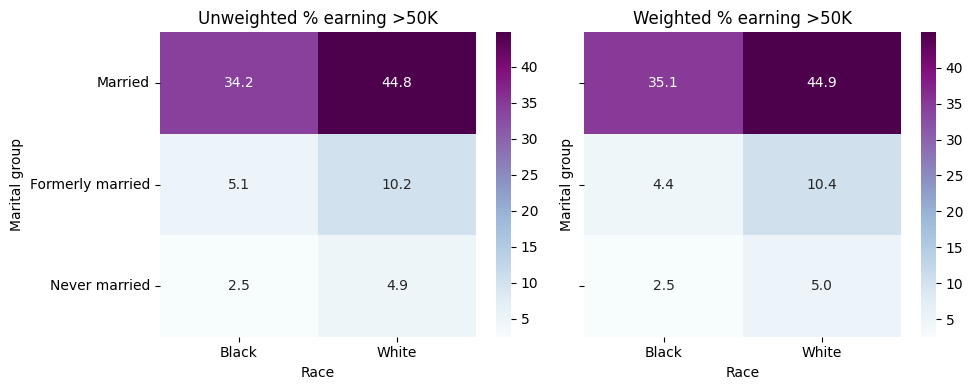

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.heatmap(pivot_unweighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[0])
axes[0].set_title("Unweighted % earning >50K")

sns.heatmap(pivot_weighted, annot=True, fmt=".1f", cmap="BuPu", ax=axes[1])
axes[1].set_title("Weighted % earning >50K")

for ax in axes:
    ax.set_xlabel("Race")
    ax.set_ylabel("Marital group")

plt.tight_layout()
plt.show()



**The likelihood of earning more than 50K varies strongly with marital status for both racial groups, but remains consistently lower among Black respondents.** Among married individuals, about 35% of Black and 45% of White respondents report high income, showing a notable racial gap even within the same marital group.

For the formerly married, the shares drop to roughly 4–5% among Black and 10% among White respondents, while the never-married group remains lowest overall, below 5% in both races.

Applying weights yields virtually identical results.

### **5.3 Age vs Income and Sex/Race**

#### ***5.3.1 How does the probability of earning >50K change with age?***

In [73]:
unweighted_age = (
    data_work_df.groupby('salary')['age']
    .mean()
    .rename('unweighted_mean_age')
    .round(1)
)
unweighted_age


salary
<=50K    36.8
>50K     44.2
Name: unweighted_mean_age, dtype: float64

In [74]:
def weighted_mean_age(g):
    w = g['fnlwgt']
    return (g['age'] * w).sum() / w.sum()

weighted_age = (
    data_work_df.groupby('salary')
    .apply(weighted_mean_age)
    .rename('weighted_mean_age')
    .round(1)
)
weighted_age


salary
<=50K    36.2
>50K     43.9
Name: weighted_mean_age, dtype: float64

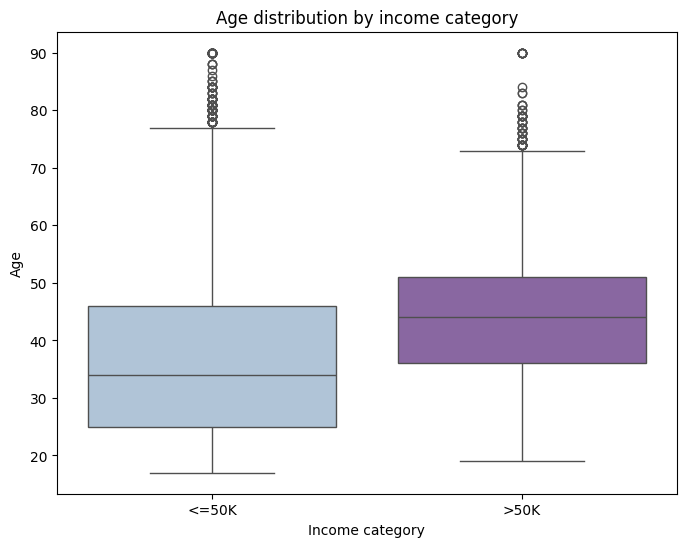

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_work_df, x='salary', y='age', palette='BuPu')
plt.title('Age distribution by income category')
plt.xlabel('Income category')
plt.ylabel('Age')
plt.show()

**Respondents earning more than 50K are, on average, about 44 years old, compared to 36 years among those earning less.**

The boxplot illustrates that higher-income individuals tend to be concentrated in the range of roughly 35–50 years, while the lower-income group includes a larger share of younger respondents. At both ends of the age spectrum, few individuals report high income.

Weighted averages differ only slightly from the unweighted ones.

#### ***5.3.2 Does it differ between men and women?***

In [76]:
unweighted_age_by_sex = (
    data_work_df.groupby(['salary', 'sex'])['age']
      .mean()
      .rename('unweighted_mean_age')
      .round(1)
      .reset_index()
)

unweighted_age_by_sex

,salary,sex,unweighted_mean_age
0,<=50K,Female,36.2
1,<=50K,Male,37.1
2,>50K,Female,42.1
3,>50K,Male,44.6


In [77]:
def weighted_mean_age(g):
    w = g['fnlwgt']
    return (g['age'] * w).sum() / w.sum()

weighted_age_by_sex = (
    data_work_df.groupby(['salary', 'sex'])
      .apply(weighted_mean_age)
      .rename('weighted_mean_age')
      .round(1)
      .reset_index()
)

weighted_age_by_sex

,salary,sex,weighted_mean_age
0,<=50K,Female,35.8
1,<=50K,Male,36.4
2,>50K,Female,41.7
3,>50K,Male,44.2


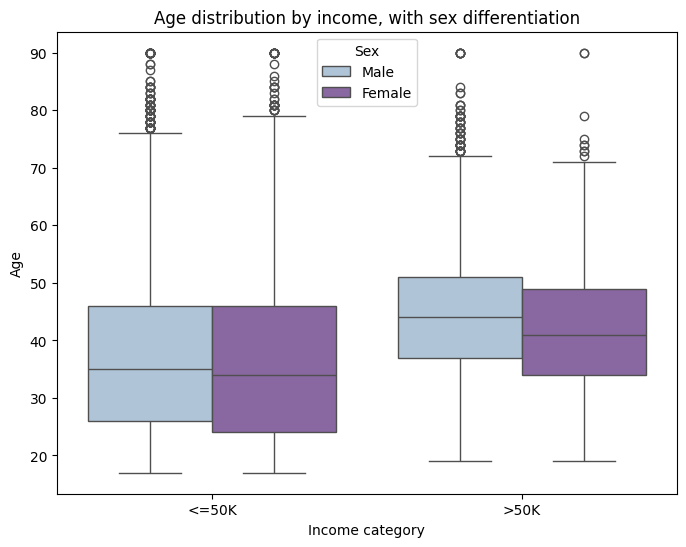

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_work_df, x='salary', y='age', hue='sex', palette='BuPu')
plt.title('Age distribution by income, with sex differentiation')
plt.xlabel('Income category')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()

**Age and income are closely linked for both sexes.** High earners are noticeably older on average: about 44 years for men and 42 years for women, compared with 36 - 37 years among lower-income respondents.

The gender difference in age within each income group is modest, yet noticeable.

Weighting the data produces nearly identical results.

#### ***5.3.3 Does it differ between Black and White individuals?***

In [79]:
unweighted_age_by_race = (
    race_subset.groupby(['salary', 'race'])['age']
      .mean()
      .rename('unweighted_mean_age')
      .round(1)
      .reset_index()
)

unweighted_age_by_race


,salary,race,unweighted_mean_age
0,<=50K,Black,36.9
1,<=50K,White,36.8
2,>50K,Black,43.7
3,>50K,White,44.4


In [80]:
def weighted_mean_age(g):
    w = g['fnlwgt']
    return (g['age'] * w).sum() / w.sum()

weighted_age_by_race = (
    race_subset.groupby(['salary', 'race'])
      .apply(weighted_mean_age)
      .rename('weighted_mean_age')
      .round(1)
      .reset_index()
)

weighted_age_by_race


,salary,race,weighted_mean_age
0,<=50K,Black,36.1
1,<=50K,White,36.2
2,>50K,Black,42.9
3,>50K,White,44.0


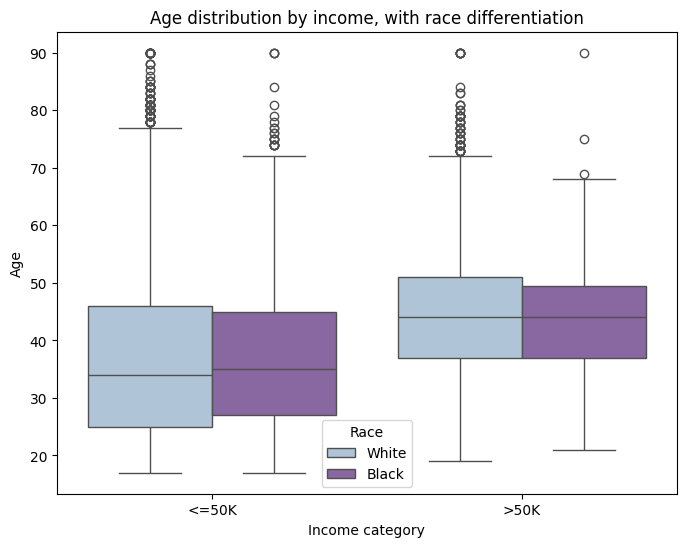

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=race_subset, x='salary', y='age', hue='race', palette='BuPu')
plt.title('Age distribution by income, with race differentiation')
plt.xlabel('Income category')
plt.ylabel('Age')
plt.legend(title='Race')
plt.show()

**Age differences between income groups are consistent across races, but the racial gap itself is small.** Both Black and White respondents earning more than 50K are on average around 43–44 years old, compared with about 36 years among those earning less.

The boxplot shows very similar age distributions for both races within each income group, suggesting that age plays a similar role in income levels across racial groups.

Weighted averages confirm this pattern.

Thus, while age remains a strong predictor of income, racial disparities in age-income structure are less pronounced than the gender gap observed earlier.